<a href="https://colab.research.google.com/github/Sameer55555/Practice/blob/master/Digit_recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing required Liabrarys
import pandas as pd
import numpy as np
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers

In [0]:
# Code to read H5 file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=1bn8O_vgOd62jYfiq2_oRPJjyVcR6JIkp'
link2 = 'https://drive.google.com/open?id=1dCcP8h7vm6F-rrFnZ83NQdlJGxxZZsyN'

In [0]:
fluff, id = link.split('=')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('train.csv')

In [0]:
fluff, id = link2.split('=')
downloaded2 = drive.CreateFile({'id':id}) 
downloaded2.GetContentFile('test.csv')

In [0]:
train_data = pd.read_csv('train.csv')

In [0]:
test_data = pd.read_csv('test.csv')

In [48]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [49]:
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
X = train_data.drop(['label'], axis=1)
y = train_data['label']

In [0]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 42)
X_train = np.array(X_train)
X_train = preprocessing.normalize(X_train)
X_test = np.array(X_test)
X_test = preprocessing.normalize(X_test)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [188]:
X_train.shape, y_train.shape

((29400, 784), (29400, 10))

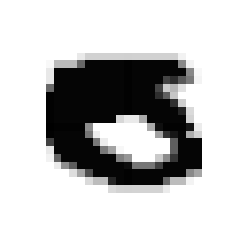

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [174]:
#Visualizing the image. 
import matplotlib.pyplot as plt
i = 5
plt.imshow(X_train[i,:].reshape(28,28), cmap = plt.cm.binary)
plt.axis("off")
plt.show()
print(y_train[i])

In [156]:
X_train.shape

(29400, 784)

**NN Network**

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras import optimizers

In [0]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))    
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))
    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [191]:
model = mlp_model()
history = model.fit(X_train, y_train, epochs = 10, batch_size=700, verbose = 1)

Train on 29400 samples
Epoch 1/10
29400/29400 [==============================] - 1s 44us/sample - loss: 2.3903 - acc: 0.1672
Epoch 2/10
29400/29400 [==============================] - 1s 25us/sample - loss: 1.8958 - acc: 0.3406
Epoch 3/10
29400/29400 [==============================] - 1s 24us/sample - loss: 1.6669 - acc: 0.4503
Epoch 4/10
29400/29400 [==============================] - 1s 25us/sample - loss: 1.5100 - acc: 0.5185
Epoch 5/10
29400/29400 [==============================] - 1s 22us/sample - loss: 1.3801 - acc: 0.5706
Epoch 6/10
29400/29400 [==============================] - 1s 24us/sample - loss: 1.2718 - acc: 0.6117
Epoch 7/10
29400/29400 [==============================] - 1s 25us/sample - loss: 1.1710 - acc: 0.6495
Epoch 8/10
29400/29400 [==============================] - 1s 25us/sample - loss: 1.0858 - acc: 0.6817
Epoch 9/10
29400/29400 [==============================] - 1s 23us/sample - loss: 1.0069 - acc: 0.7074
Epoch 10/10
29400/29400 [==============================] - 

In [192]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

12600/12600 [==============================] - 1s 110us/sample - loss: 0.6217 - acc: 0.8827
Test accuracy:  0.8826984


In [193]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 50)                39250     
_________________________________________________________________
batch_normalization_24 (Batc (None, 50)                200       
_________________________________________________________________
activation_30 (Activation)   (None, 50)                0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_31 (Dense)             (None, 50)                2550      
_________________________________________________________________
batch_normalization_25 (Batc (None, 50)                200       
_________________________________________________________________
activation_31 (Activation)   (None, 50)               

In [0]:
Y_pred_cls = model.predict_classes(X_test, batch_size=200, verbose=0)

In [195]:
print('Accuracy Model1 (Dropout): '+ str(model.evaluate(X_test,y_test)[1]))

12600/12600 [==============================] - 1s 90us/sample - loss: 0.6217 - acc: 0.8827
Accuracy Model1 (Dropout): 0.8826984


In [0]:
y_test = np.argmax(y_test, axis=1)

In [197]:
print('Recall_score: ' + str(recall_score(y_test,Y_pred_cls, pos_label=1, average='micro')))

Recall_score: 0.8826984126984126


In [198]:
print('Precision_score: ' + str(precision_score(y_test, Y_pred_cls, pos_label=1, average='micro')))
print('F-score: ' + str(f1_score(y_test,Y_pred_cls, pos_label=1, average='micro')))
confusion_matrix(y_test, Y_pred_cls)

Precision_score: 0.8826984126984126
F-score: 0.8826984126984126


array([[1166,    0,    9,    1,    3,   12,    8,    0,    1,    0],
       [   1, 1344,   17,    1,    1,    2,    2,    3,   18,    0],
       [  14,   11, 1164,   29,   14,    3,   24,    7,   28,    0],
       [   2,    6,  142, 1092,    2,   44,    5,   22,   39,    1],
       [  10,   13,    4,    2, 1089,    8,   36,    3,    4,   53],
       [  27,    2,   31,   29,    9,  895,   26,   11,   52,    3],
       [  29,    8,   27,    0,    1,   24, 1155,    0,   11,    1],
       [   7,   33,   29,   13,   21,    1,    0, 1191,    3,   61],
       [  17,   38,   38,   26,    6,   35,   10,    3, 1030,    6],
       [  20,    7,    3,   17,   35,    9,    3,  114,   27,  996]])